In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Segregating Images and lokooking into the data

In [ ]:
import pandas as pd

Checking For data.csv file

In [4]:
train = pd.read_csv("/content/drive/MyDrive/data.csv")

In [5]:
train=pd.DataFrame(train)

In [6]:
print(train.isnull().sum())

pixel_0000    0
pixel_0001    0
pixel_0002    0
pixel_0003    0
pixel_0004    0
             ..
pixel_1020    0
pixel_1021    0
pixel_1022    0
pixel_1023    0
character     0
Length: 1025, dtype: int64


In [7]:
train.dtypes

pixel_0000     int64
pixel_0001     int64
pixel_0002     int64
pixel_0003     int64
pixel_0004     int64
               ...  
pixel_1020     int64
pixel_1021     int64
pixel_1022     int64
pixel_1023     int64
character     object
Length: 1025, dtype: object

In [8]:
#Extracting Last column from the table
Column_name=train["character"].to_numpy()
del train["character"]

In [33]:
print(Column_name)

['character_01_ka' 'character_01_ka' 'character_01_ka' ... 'digit_9'
 'digit_9' 'digit_9']


In [10]:
train.to_numpy(dtype='int')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
train=np.array(train).astype('int')

Visualising Images

In [12]:
train.shape

(92000, 1024)

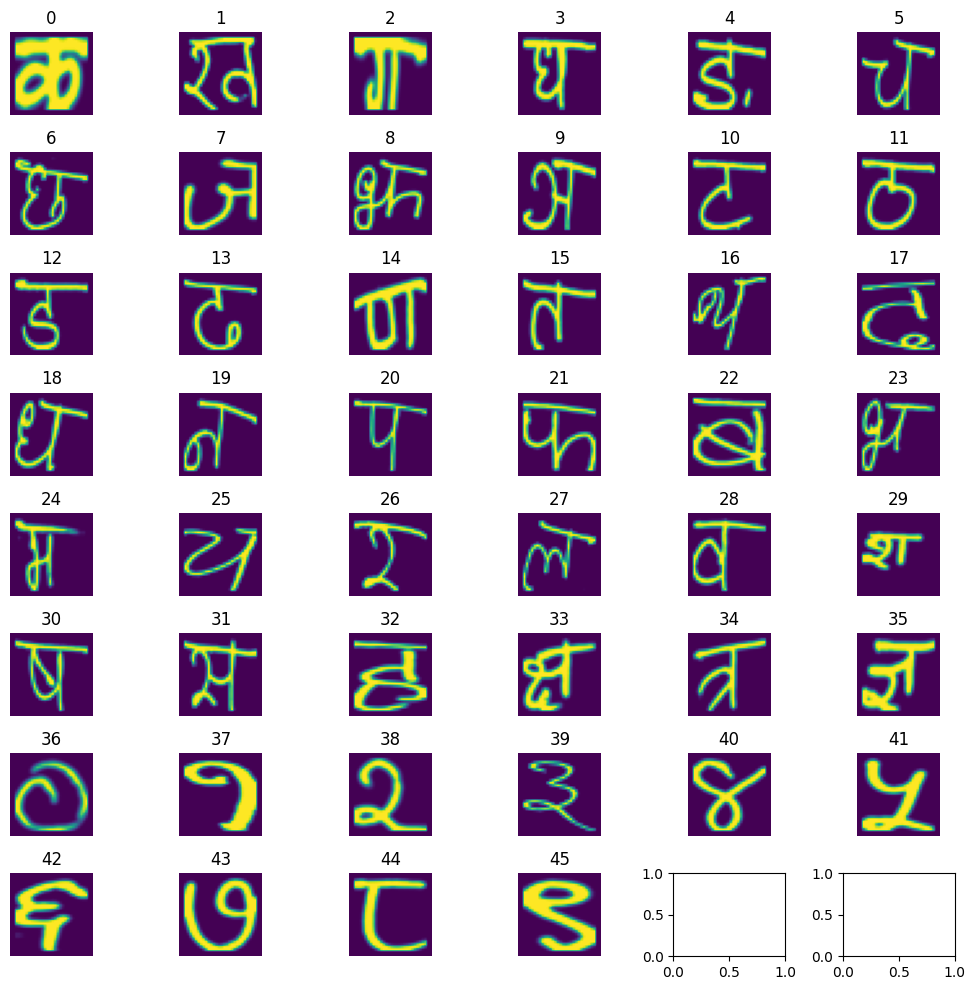

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
dict={}

count=0
#range(start,stop,step)
for i in range(0,92000,2000):
    imarray=np.array(train[i].reshape(32,32))
    dict.update({count:imarray})
    count=count+1
    if count >= 92000:
        break

figure, ax = plt.subplots(nrows=8,ncols=6,figsize=(10,10) )
for ind,title in enumerate(dict):
    ax.ravel()[ind].imshow(dict[title])
    ax.ravel()[ind].set_title(title)
    ax.ravel()[ind].set_axis_off()
plt.tight_layout()
plt.show()

Train images and column with One Hot encoding

In [14]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
values = array(Column_name)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['character_01_ka' 'character_01_ka' 'character_01_ka' ... 'digit_9'
 'digit_9' 'digit_9']
[ 0  0  0 ... 45 45 45]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
['character_01_ka']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(train.astype("float32"),onehot_encoded, test_size=0.1, random_state=42)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((82800, 1024), (9200, 1024), (82800, 46), (9200, 46))

In [17]:
X_train=(X_train.reshape(82800,32,32))/255
X_test=(X_test.reshape(9200,32,32))/255


In [18]:
X_train.shape

(82800, 32, 32)

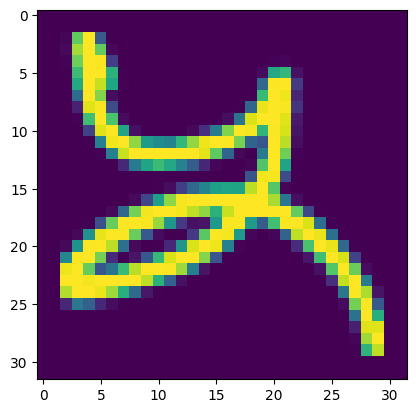

In [19]:
plt.imshow(X_train[44])

Keras Model

In [20]:
from tensorflow.python.keras.layers import Dense,Conv2D,MaxPooling2D,GlobalMaxPooling2D,Flatten,Dropout
from tensorflow.python.keras.models import Sequential
import tensorflow as tf
from keras.layers import Input

In [21]:
model = Sequential(name="my_sequential")
model.add(Conv2D(50,(3,3),activation="relu",kernel_initializer='he_uniform', input_shape=(32,32,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu",kernel_initializer='he_uniform'))
model.add(Dense(46,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [22]:
model.summary()

Model: "my_sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 50)        500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 11250)             0         
_________________________________________________________________
dropout (Dropout)            (None, 11250)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2880256   
_________________________________________________________________
dense_1 (Dense)              (None, 46)                11822     
Total params: 2,892,578
Trainable params: 2,892,578
Non-trainable params: 0
___________________________________________

Building model is compulsory using Tensorflow libraries

In [23]:
'''Here x_train is grayscale image which is having only one band of color, unlike RGB which has 3
So, we need to add additional shape here that is 1 reshape the vector.
'''
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [24]:
history=model.fit(X_train, y_train, batch_size=50, epochs=10, validation_split=None,validation_data=(X_test,y_test))

Epoch 1/10
1656/1656 [==============================] - 17s 5ms/step - loss: 0.6495 - acc: 0.8161 - val_loss: 0.2734 - val_acc: 0.9184
Epoch 2/10
1656/1656 [==============================] - 7s 5ms/step - loss: 0.2182 - acc: 0.9332 - val_loss: 0.1787 - val_acc: 0.9484
Epoch 3/10
1656/1656 [==============================] - 6s 4ms/step - loss: 0.1493 - acc: 0.9532 - val_loss: 0.1568 - val_acc: 0.9571
Epoch 4/10
1656/1656 [==============================] - 7s 4ms/step - loss: 0.1135 - acc: 0.9634 - val_loss: 0.1405 - val_acc: 0.9586
Epoch 5/10
1656/1656 [==============================] - 6s 4ms/step - loss: 0.0894 - acc: 0.9706 - val_loss: 0.1391 - val_acc: 0.9633
Epoch 6/10
1656/1656 [==============================] - 7s 5ms/step - loss: 0.0763 - acc: 0.9745 - val_loss: 0.1344 - val_acc: 0.9637
Epoch 7/10
1656/1656 [==============================] - 6s 4ms/step - loss: 0.0641 - acc: 0.9782 - val_loss: 0.1295 - val_acc: 0.9663
Epoch 8/10
1656/1656 [==============================] - 7s 4m

In [ ]:
"""model.fit(
    x=X_train,
    y=y_train,
    batch_size=None,
    epochs=10,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=10,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
"""

'model.fit(\n    x=X_train,\n    y=y_train,\n    batch_size=None,\n    epochs=10,\n    verbose="auto",\n    callbacks=None,\n    validation_split=0.0,\n    validation_data=None,\n    shuffle=True,\n    class_weight=None,\n    sample_weight=None,\n    initial_epoch=0,\n    steps_per_epoch=10,\n    validation_steps=None,\n    validation_batch_size=None,\n    validation_freq=1,\n    max_queue_size=10,\n    workers=1,\n    use_multiprocessing=False,\n)\n'

In [25]:
model.evaluate(
    x=X_test,
    y=y_test,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    #**kwargs
)


288/288 [==============================] - 1s 3ms/step - loss: 0.1285 - acc: 0.9703


[0.12849564850330353, 0.9703260660171509]

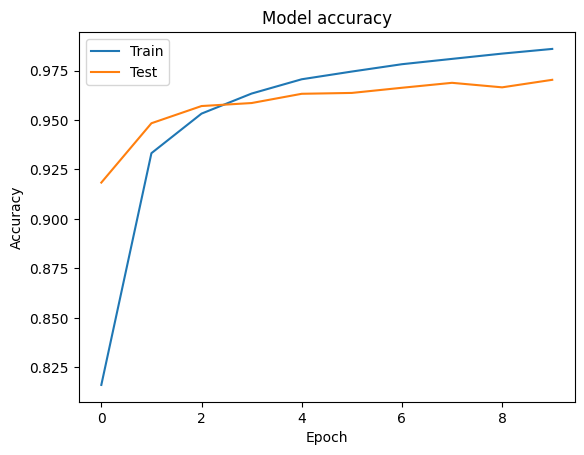

In [26]:
#Plot of Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



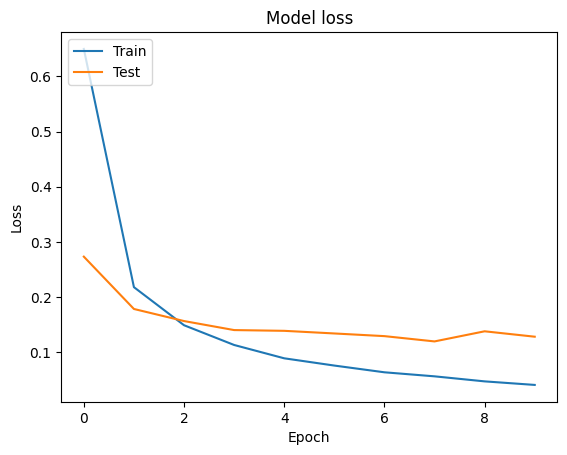

In [27]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
model.save("model.h5")

In [29]:
import cv2
import numpy as np

def preprocess_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to the input shape of your model (e.g., (32, 32))
    image = cv2.resize(image, (32, 32))

    # Normalize the pixel values to be between 0 and 1
    image = image.astype("float32") / 255.0

    # Add an additional dimension for the grayscale channel (1 channel)
    image = np.expand_dims(image, axis=-1)

    return image


Predicted class: character_01_ka


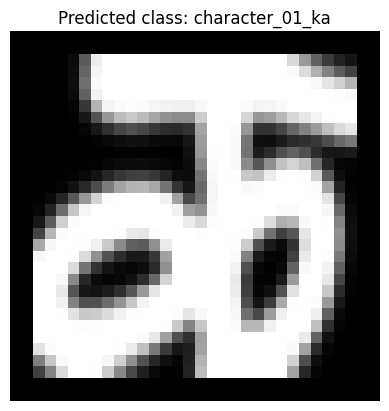

In [32]:
# Path to the image you want to test
image_path = '/content/drive/MyDrive/Devanagari dataset/Test/character_1_ka/10963.png'

# Preprocess the image
test_image = preprocess_image(image_path)

# Make predictions using the model
predictions = model.predict(np.expand_dims(test_image, axis=0))

# Get the predicted class (the index of the class with the highest probability)
predicted_class_index = np.argmax(predictions)

# If you have a list of class labels, you can map the index to the actual class label

predicted_class_label = Column_name[predicted_class_index]

# Print the predicted class label
print("Predicted class:", predicted_class_label)
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title('Predicted class: ' + predicted_class_label)
plt.axis('off')
plt.show()
